In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [89]:
# print pandas version
print(pd.__version__)

1.5.0


In [90]:
df = pd.read_csv('./data/data.csv')

In [91]:
# display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [92]:
# drop columns id and Unnamed: 32
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [93]:
# display all unique values in the diagnosis column
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [94]:
# convert diagnosis column to bool (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype('bool')

False    357
True     212
Name: diagnosis, dtype: int64


<AxesSubplot: >

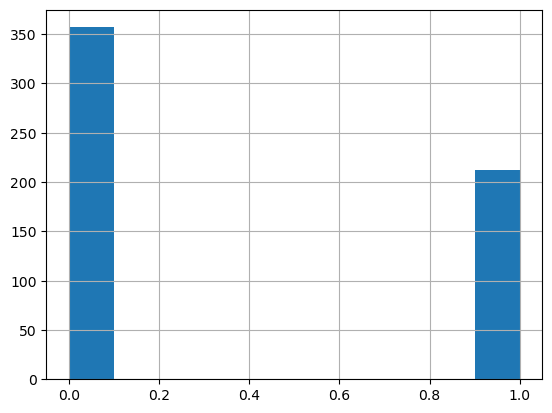

In [95]:
# check balance of diagnosis column
print(df['diagnosis'].value_counts())
# display histogram of diagnosis column
df['diagnosis'].astype('uint8').hist()

## features description
- No missing values
- All features continuous
- Target variable binary
- Target variable looks somewhat balanced, but maybe there is a room for under/oversampling, or smote

In [96]:
# TODO: check for outliers

In [97]:
# check variance of each column
df.var()

diagnosis                       0.234177
radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst      

Some columns have high variance, there is a room for scaling.

In [98]:
# apply min-max normalization to all columns except diagnosis
df_norm = df.copy()
df_norm.drop(['diagnosis'], axis=1, inplace=True)
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())
# add diagnosis column to normalized dataframe
df_norm['diagnosis'] = df['diagnosis']

In [99]:
# check variance of each column after normalization
df_norm.var()

radius_mean                0.027818
texture_mean               0.021156
perimeter_mean             0.028195
area_mean                  0.022283
smoothness_mean            0.016121
compactness_mean           0.026242
concavity_mean             0.034889
concave points_mean        0.037194
symmetry_mean              0.019170
fractal_dimension_mean     0.022112
radius_se                  0.010084
texture_se                 0.014864
perimeter_se               0.009076
area_se                    0.007219
smoothness_se              0.010418
compactness_se             0.018090
concavity_se               0.005811
concave points_se          0.013662
symmetry_se                0.013529
fractal_dimension_se       0.008357
radius_worst               0.029563
texture_worst              0.026835
perimeter_worst            0.028007
area_worst                 0.019581
smoothness_worst           0.022734
compactness_worst          0.023302
concavity_worst            0.027766
concave points_worst       0

In [100]:
# TODO: check for correlation between columns

/home/bubakulus/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/bubakulus/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


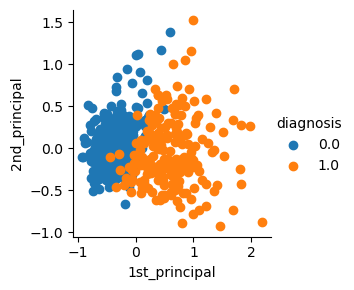

In [101]:
# visualize using PCA based on diagnosis column

# prepare PCA
pca = PCA(n_components=2)
# fit PCA to normalized dataframe
pca.fit(df_norm.drop(['diagnosis'], axis=1))

# transform normalized dataframe
pca_data = pca.transform(df_norm.drop(['diagnosis'], axis=1))
# add diagnosis column to transformed dataframe
pca_data = np.vstack((pca_data.T, df_norm['diagnosis'].astype('uint8'))).T

# create dataframe from transformed data
pca_df = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal', 'diagnosis'))

# visualize transformed data
sns.FacetGrid(pca_df, hue='diagnosis').map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Most of data can be separated even with a line in 2d space, it is expected, that future models will be able to classify data with high accuracy.